In [4162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.naive_bayes import GaussianNB

# Train Data

In [4164]:
df=pd.read_csv("/Users/sagar/Downloads/train_ctrUa4K.csv")


In [4165]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4166]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

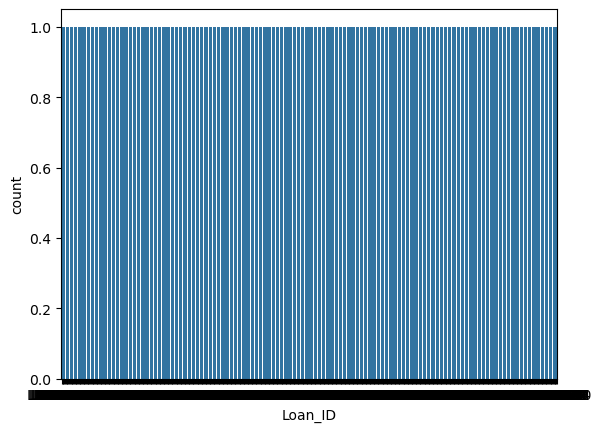

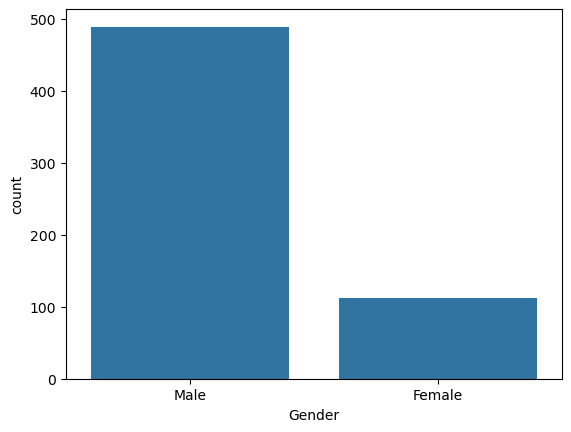

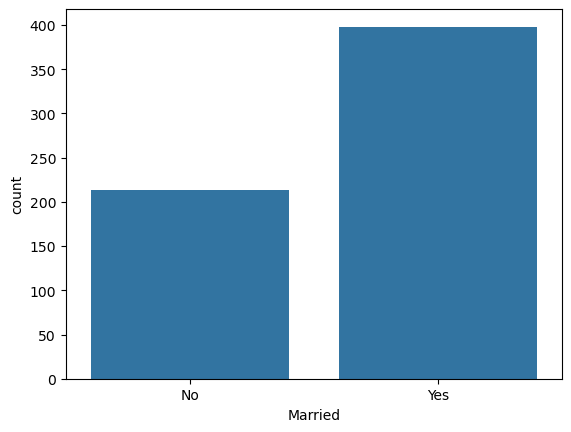

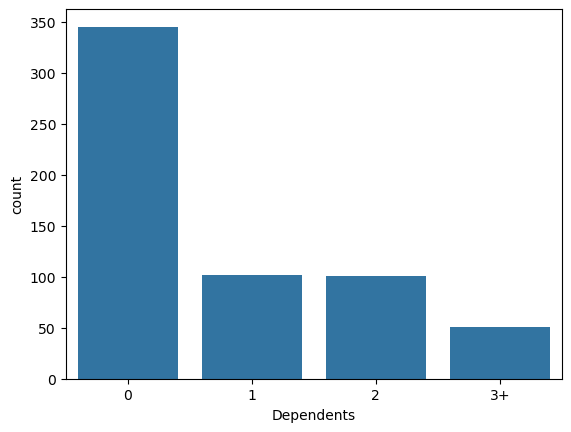

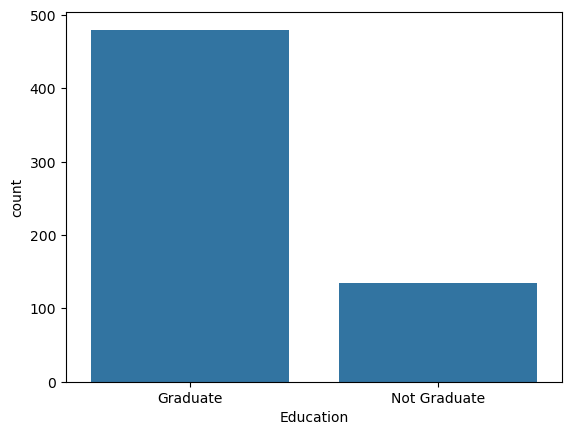

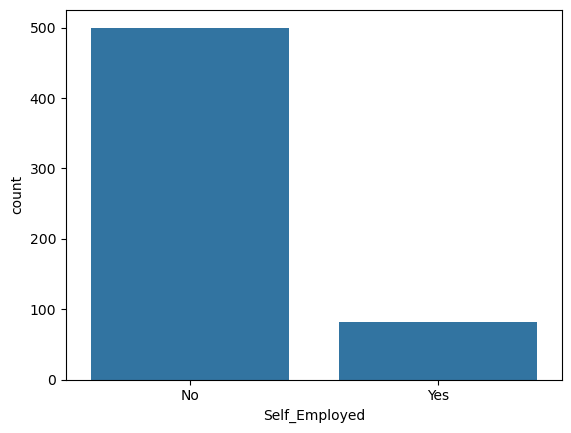

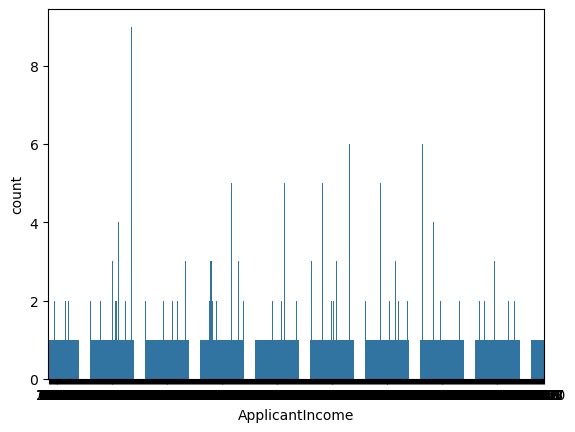

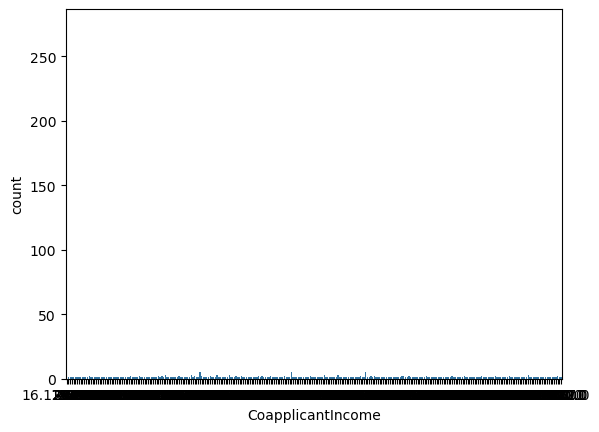

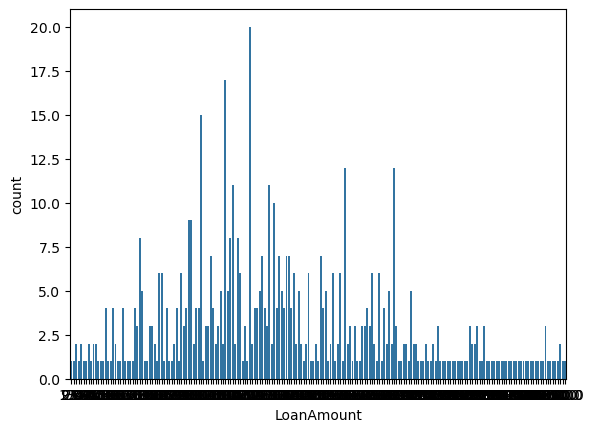

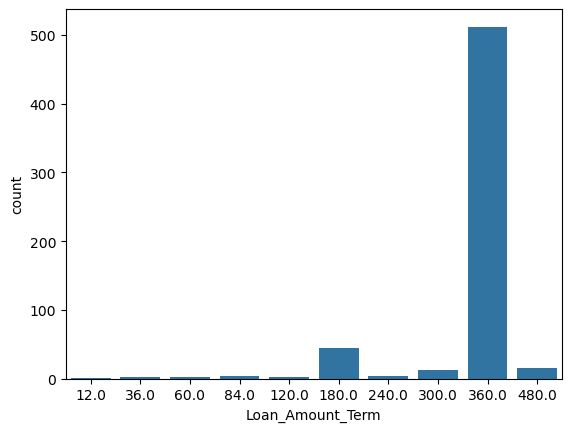

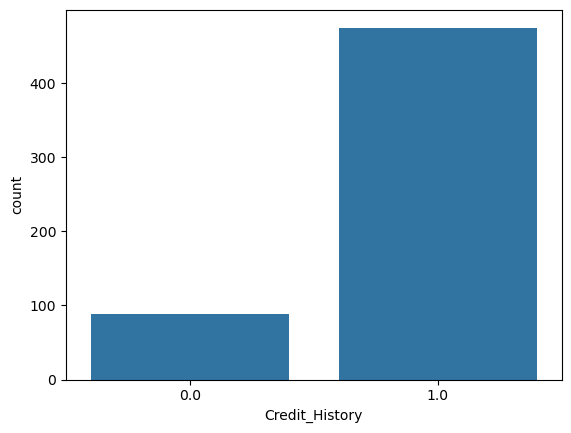

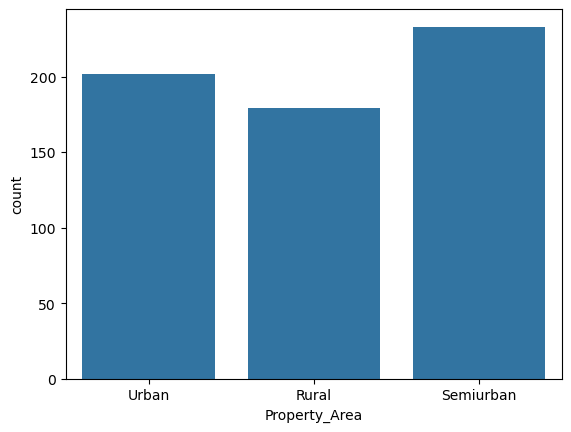

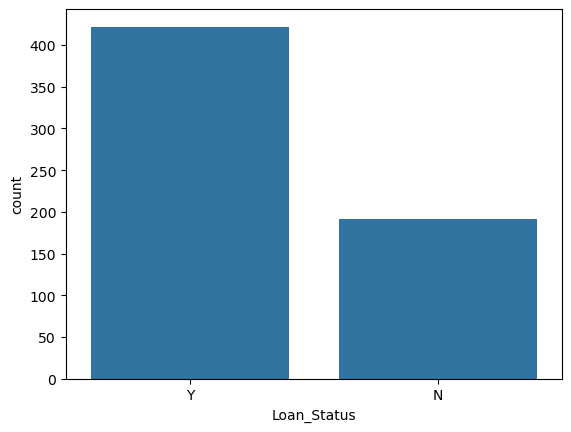

In [4167]:
for col in df:
    sns.countplot(x=col,data=df)
    #plt.title(col)
    plt.show()


In [4168]:
num_df=df.select_dtypes(include="number")
cat_df=df.select_dtypes(include="object")

<Axes: >

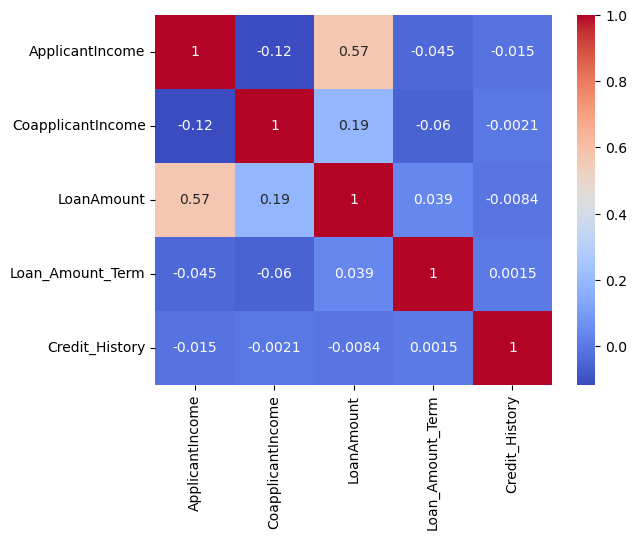

In [4169]:
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm")

In [4170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

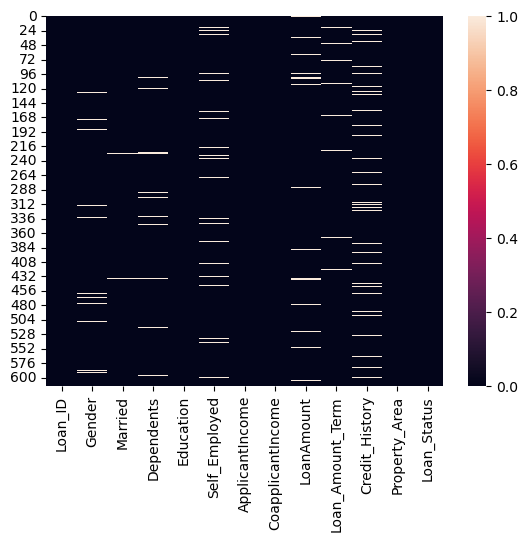

In [4171]:
sns.heatmap(df.isnull())

## Handling missing values

In [4173]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [4174]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4175]:
#df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [4176]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4177]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

In [4178]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4179]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [4180]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [4181]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4182]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [4183]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [4184]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4185]:
df=df.dropna()

In [4186]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4187]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Outliers

In [4189]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


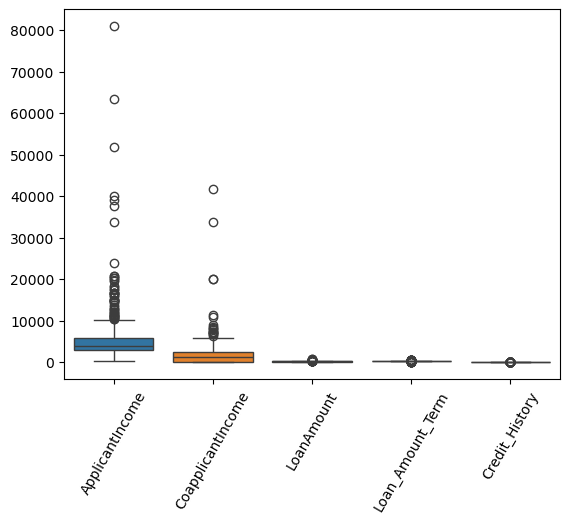

In [4190]:
sns.boxplot(df)
plt.xticks(rotation=60)
plt.show()

In [4191]:
def count_outliers_all_columns(df):
    outliers_count = {}
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = len(outliers)
    return outliers_count

In [4192]:
count_outliers_all_columns(df)

{'ApplicantIncome': 50,
 'CoapplicantIncome': 18,
 'LoanAmount': 41,
 'Loan_Amount_Term': 86,
 'Credit_History': 89}

In [4193]:
def handle_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upp_bound=q3+1.5*iqr
    low_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upp_bound)
    df[column_name]=df[column_name].clip(lower=low_bound)
    return df

In [4194]:
#handle_outliers(df,"ApplicantIncome")
#handle_outliers(df,"CoapplicantIncome")
#handle_outliers(df,"LoanAmount")
#handle_outliers(df,"Loan_Amount_Term")
#handle_outliers(df,"Credit_History")


In [4195]:
count_outliers_all_columns(df)

{'ApplicantIncome': 50,
 'CoapplicantIncome': 18,
 'LoanAmount': 41,
 'Loan_Amount_Term': 86,
 'Credit_History': 89}

## SCALING

In [4197]:
minmax=MinMaxScaler()

In [4198]:
df["ApplicantIncome"]=minmax.fit_transform(df[["ApplicantIncome"]])

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/3742895589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ApplicantIncome"]=minmax.fit_transform(df[["ApplicantIncome"]])


In [4199]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.0,187.000000,360.0,1.0,Urban,Y


In [4200]:
df["CoapplicantIncome"]=minmax.fit_transform(df[["CoapplicantIncome"]])

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/2119045476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CoapplicantIncome"]=minmax.fit_transform(df[["CoapplicantIncome"]])


In [4201]:
df["LoanAmount"]=minmax.fit_transform(df[["LoanAmount"]])

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/2902966407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LoanAmount"]=minmax.fit_transform(df[["LoanAmount"]])


In [4202]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.198860,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y


## Encoding

In [4204]:
cat_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [4205]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [4206]:
label_enc=LabelEncoder()
df["Gender"]=label_enc.fit_transform(df["Gender"])

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/81173548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"]=label_enc.fit_transform(df["Gender"])


In [4207]:
dependent_num=["0","1","2","3+"]
ord_enc=OrdinalEncoder(categories=[dependent_num])
df["Dependents"]=ord_enc.fit_transform(df[["Dependents"]])


/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/3308146709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dependents"]=ord_enc.fit_transform(df[["Dependents"]])


In [4208]:
df["Married"]=label_enc.fit_transform(df["Married"])

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/1439406469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Married"]=label_enc.fit_transform(df["Married"])


In [4209]:
#df["Dependents"]=label_enc.fit_transform(df["Dependents"])
df["Education"]=label_enc.fit_transform(df["Education"])
df["Self_Employed"]=label_enc.fit_transform(df["Self_Employed"])
df["Loan_Status"]=label_enc.fit_transform(df["Loan_Status"])

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/2107100232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"]=label_enc.fit_transform(df["Education"])
/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/2107100232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Self_Employed"]=label_enc.fit_transform(df["Self_Employed"])
/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/2107100232.py:4: SettingWithCopyWarning: 
A value is trying to be set

In [4210]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,0.070489,0.000000,0.198860,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,0,0,0.054830,0.036192,0.172214,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,0,1,0.035250,0.000000,0.082489,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,1,0,0.030093,0.056592,0.160637,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,0,0,0.072356,0.000000,0.191027,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,0,0.034014,0.000000,0.089725,360.0,1.0,Rural,1
610,LP002979,1,1,3.0,0,0,0.048930,0.000000,0.044863,180.0,1.0,Rural,1
611,LP002983,1,1,1.0,0,0,0.097984,0.005760,0.353111,360.0,1.0,Urban,1
612,LP002984,1,1,2.0,0,0,0.091936,0.000000,0.257598,360.0,1.0,Urban,1


In [4211]:
#df=pd.get_dummies(df,columns=["Property_Area"],prefix="Area",dtype="int")
df["Property_Area"]=label_enc.fit_transform(df["Property_Area"])
df

/var/folders/qc/5yh22fjd1gz2h2qcp8996j9h0000gn/T/ipykernel_37325/3768548531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property_Area"]=label_enc.fit_transform(df["Property_Area"])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,0.070489,0.000000,0.198860,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,0.054830,0.036192,0.172214,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,0.035250,0.000000,0.082489,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,0.030093,0.056592,0.160637,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,0.072356,0.000000,0.191027,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,0,0.034014,0.000000,0.089725,360.0,1.0,0,1
610,LP002979,1,1,3.0,0,0,0.048930,0.000000,0.044863,180.0,1.0,0,1
611,LP002983,1,1,1.0,0,0,0.097984,0.005760,0.353111,360.0,1.0,2,1
612,LP002984,1,1,2.0,0,0,0.091936,0.000000,0.257598,360.0,1.0,2,1


# Test Data

In [4213]:
dt=pd.read_csv("/Users/sagar/Downloads/test_lAUu6dG.csv")

In [4214]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4215]:
dt.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

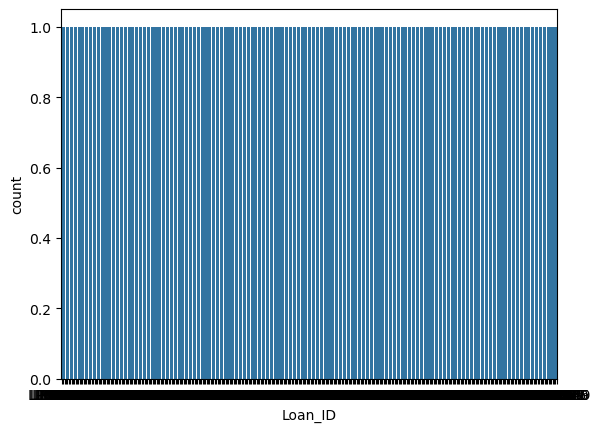

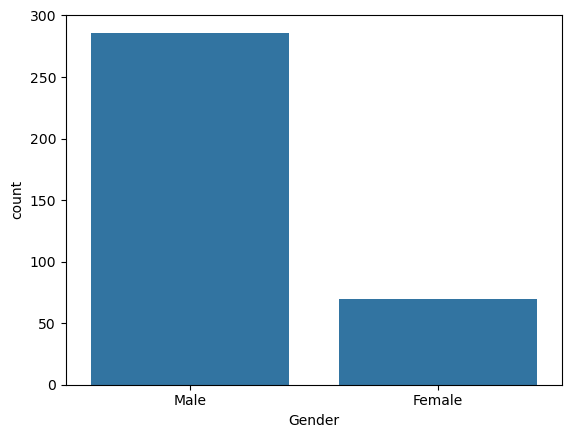

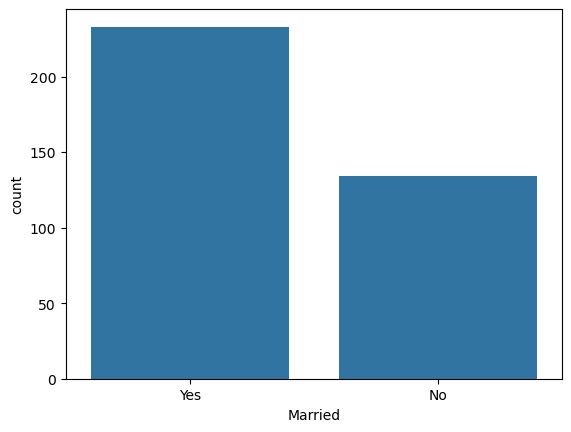

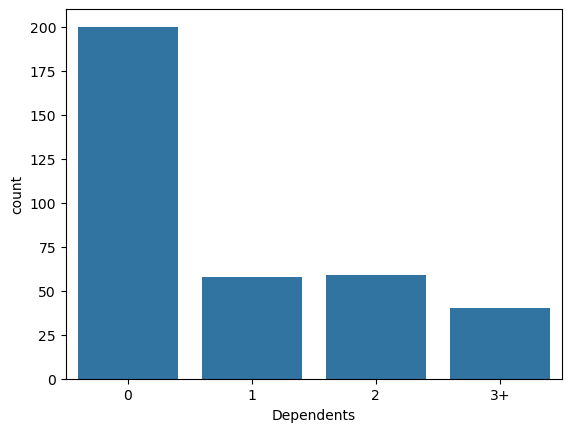

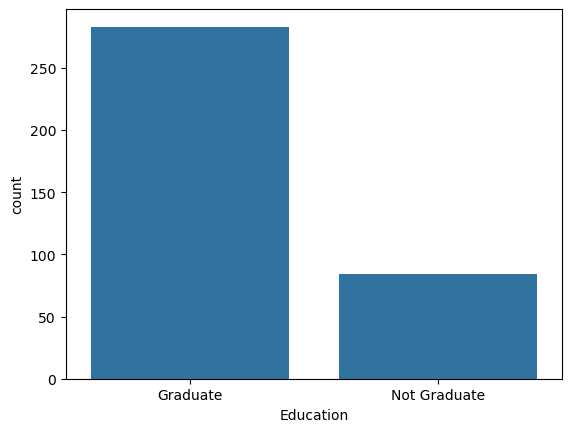

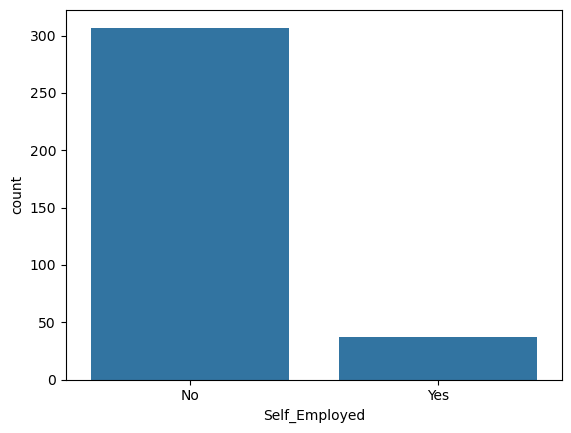

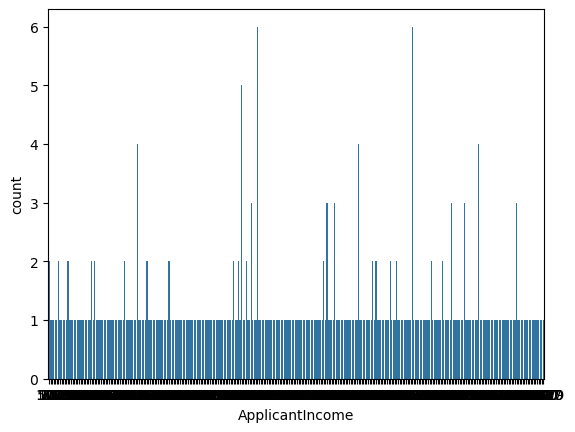

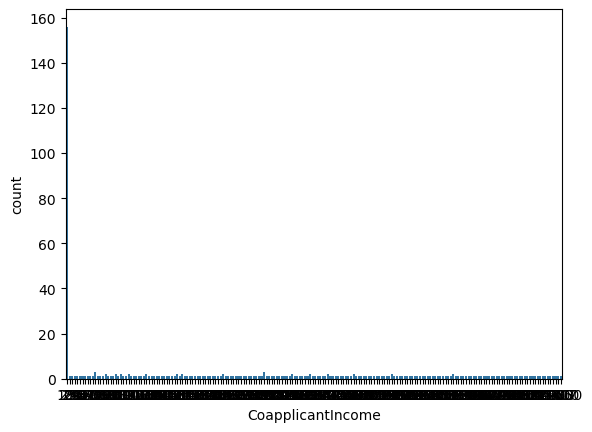

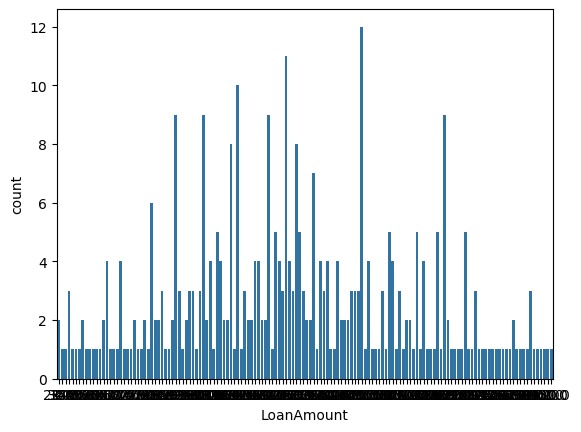

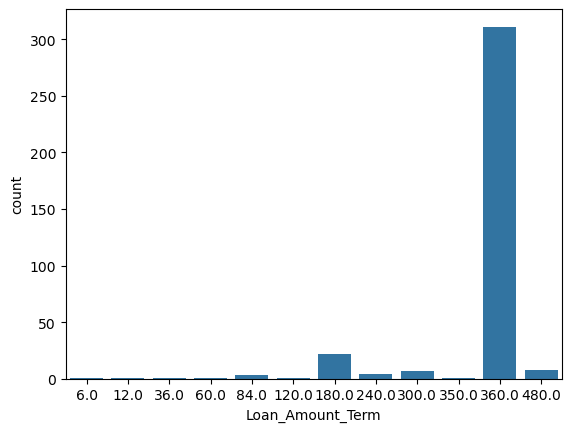

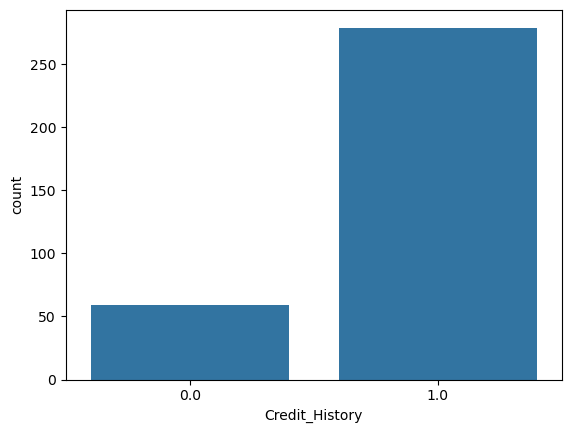

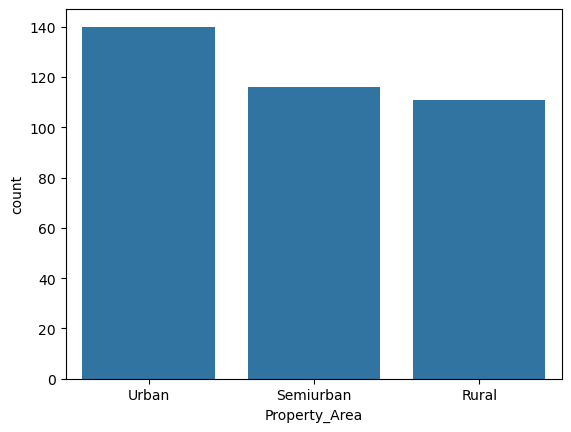

In [4216]:
for col in dt:
    sns.countplot(x=col,data=dt)
    #plt.title(col)
    plt.show()


In [4217]:
dt["Gender"]=dt["Gender"].fillna(dt["Gender"].mode()[0])

In [4218]:
dt["Dependents"]=dt["Dependents"].fillna(dt["Dependents"].mode()[0])

In [4219]:
dt["Self_Employed"]=dt["Self_Employed"].fillna(dt["Self_Employed"].mode()[0])


In [4220]:
dt["Credit_History"]=dt["Credit_History"].fillna(dt["Credit_History"].mode()[0])
dt["LoanAmount"]=dt["LoanAmount"].fillna(dt["LoanAmount"].mode()[0])
dt["Loan_Amount_Term"]=dt["Loan_Amount_Term"].fillna(dt["Loan_Amount_Term"].mode()[0])

In [4221]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [4222]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Outliers

([0, 1, 2, 3, 4],
 [Text(0, 0, 'ApplicantIncome'),
  Text(1, 0, 'CoapplicantIncome'),
  Text(2, 0, 'LoanAmount'),
  Text(3, 0, 'Loan_Amount_Term'),
  Text(4, 0, 'Credit_History')])

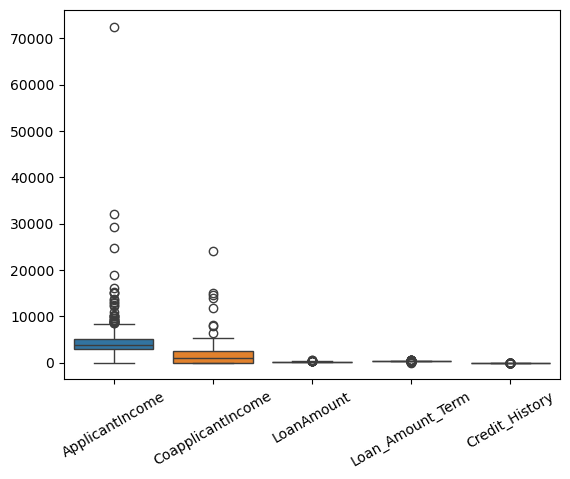

In [4224]:
sns.boxplot(dt)
plt.xticks(rotation=30)

In [4225]:
count_outliers_all_columns(dt)

{'ApplicantIncome': 32,
 'CoapplicantIncome': 8,
 'LoanAmount': 18,
 'Loan_Amount_Term': 50,
 'Credit_History': 59}

In [4226]:
#handle_outliers(dt,"ApplicantIncome")
#handle_outliers(dt,"CoapplicantIncome")
#handle_outliers(dt,"LoanAmount")
#handle_outliers(dt,"Loan_Amount_Term")
#handle_outliers(dt,"Credit_History")


In [4227]:
count_outliers_all_columns(dt)

{'ApplicantIncome': 32,
 'CoapplicantIncome': 8,
 'LoanAmount': 18,
 'Loan_Amount_Term': 50,
 'Credit_History': 59}

## scaling

In [4229]:
dt["ApplicantIncome"]=minmax.fit_transform(dt[["ApplicantIncome"]])
dt["CoapplicantIncome"]=minmax.fit_transform(dt[["CoapplicantIncome"]])
dt["LoanAmount"]=minmax.fit_transform(dt[["LoanAmount"]])

In [4230]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,0.078865,0.000000,0.157088,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,0.042411,0.062500,0.187739,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,0.068938,0.075000,0.344828,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,0.032263,0.106083,0.137931,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,0.045168,0.000000,0.095785,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,0.055274,0.074042,0.162835,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,0.057329,0.029542,0.166667,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,0.044810,0.083042,0.187739,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,0.068938,0.099708,0.249042,360.0,1.0,Rural


## encoding

In [4232]:
dt["Gender"]=label_enc.fit_transform(dt["Gender"])
dt["Married"]=label_enc.fit_transform(dt["Married"])
#dt["Dependents"]=label_enc.fit_transform(dt["Dependents"])
dt["Education"]=label_enc.fit_transform(dt["Education"])
dt["Self_Employed"]=label_enc.fit_transform(dt["Self_Employed"])
dependent_num=["0","1","2","3+"]
ord_enc=OrdinalEncoder(categories=[dependent_num])
dt["Dependents"]=ord_enc.fit_transform(dt[["Dependents"]])

In [4233]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,0,0,0.078865,0.000000,0.157088,360.0,1.0,Urban
1,LP001022,1,1,1.0,0,0,0.042411,0.062500,0.187739,360.0,1.0,Urban
2,LP001031,1,1,2.0,0,0,0.068938,0.075000,0.344828,360.0,1.0,Urban
3,LP001035,1,1,2.0,0,0,0.032263,0.106083,0.137931,360.0,1.0,Urban
4,LP001051,1,0,0.0,1,0,0.045168,0.000000,0.095785,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3.0,1,1,0.055274,0.074042,0.162835,360.0,1.0,Urban
363,LP002975,1,1,0.0,0,0,0.057329,0.029542,0.166667,360.0,1.0,Urban
364,LP002980,1,0,0.0,0,0,0.044810,0.083042,0.187739,360.0,1.0,Semiurban
365,LP002986,1,1,0.0,0,0,0.068938,0.099708,0.249042,360.0,1.0,Rural


In [4234]:
#dt=pd.get_dummies(dt,columns=["Property_Area"],prefix="Area",dtype="int")

In [4235]:
dt["Property_Area"]=label_enc.fit_transform(dt["Property_Area"])
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,0,0,0.078865,0.000000,0.157088,360.0,1.0,2
1,LP001022,1,1,1.0,0,0,0.042411,0.062500,0.187739,360.0,1.0,2
2,LP001031,1,1,2.0,0,0,0.068938,0.075000,0.344828,360.0,1.0,2
3,LP001035,1,1,2.0,0,0,0.032263,0.106083,0.137931,360.0,1.0,2
4,LP001051,1,0,0.0,1,0,0.045168,0.000000,0.095785,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3.0,1,1,0.055274,0.074042,0.162835,360.0,1.0,2
363,LP002975,1,1,0.0,0,0,0.057329,0.029542,0.166667,360.0,1.0,2
364,LP002980,1,0,0.0,0,0,0.044810,0.083042,0.187739,360.0,1.0,1
365,LP002986,1,1,0.0,0,0,0.068938,0.099708,0.249042,360.0,1.0,0


## Model Training

In [4237]:
from sklearn.model_selection import train_test_split
df=df.drop(["Loan_ID"],axis=1)
dt=dt.drop(["Loan_ID"],axis=1)
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=52)





In [4238]:
from sklearn.ensemble import RandomForestClassifier

In [4239]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [4240]:
accuracy=accuracy_score(y_test,y_pred)
#precision=precision_score(y_test,y_pred,average="weighted")
#recall=recall_score(y_test,y_pred,average="weighted")
#f1=f1_score(y_test,y_pred,average="weighted")
#print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)
accuracy

0.842391304347826

In [4241]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [4242]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8532608695652174

In [4243]:
#Logistic regression
models=LogisticRegression(max_iter=1000)
models.fit(x_train,y_train)
y_pred=models.predict(x_test)


In [4244]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8586956521739131

In [4245]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average="weighted")
recall=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)



Accuracy is 0.8586956521739131 
Precison is 0.8681164548652779 
Recall is 0.8586956521739131 
F1 score is 0.84356681608727


## WE GET THE BEST TRAINING RESULTS FROM USING LOGISTIC REGRESSION ,NOW USING THE TEST FILE FOR TRAINING

In [4247]:
jkljnjX_train=x
Y_train=y
X_test=dt

In [4248]:
#Logistic regression
models=LogisticRegression(max_iter=1000)
models.fit(X_train,Y_train)
Y_pred=models.predict(X_test)


In [4249]:
Y_pred.shape

(367,)

In [4250]:
ds=pd.read_csv('/Users/sagar/Downloads/sample_submission_49d68Cx (1).csv')

In [4251]:
ds

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [4252]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [4253]:
import numpy as np
mapp={1:"Y",0:"N"}
mapped_array = np.vectorize(mapp.get)(Y_pred)

In [4254]:
mapped_df = pd.DataFrame(mapped_array, columns=["Loan_Status"])

In [4255]:
mapped_df

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [4256]:
idd=ds["Loan_ID"]

In [4257]:
final=pd.concat([idd,mapped_df],axis=1)

In [4258]:
final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [4259]:
final.to_csv("/Users/sagar/Developer/Loanstatus.csv",index=False)

In [4260]:
final.shape

(367, 2)

In [4261]:
ds.shape

(367, 2)